<a href="https://colab.research.google.com/github/kundajelab/feature_interactions/blob/master/tabular_simulation/tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
import tensorflow as tf

def train_model(train_data, train_labels, valid_data, valid_labels, reg, seed):
  
  import random
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

  model = Sequential()
  model.add(Dense(100, input_dim = 5, activation='relu', kernel_regularizer=regularizers.l1(reg)))
  model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l1(reg)))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer="adam", loss="mean_squared_error")

  model.fit(x=train_data, y=train_labels,
            batch_size=200,
            epochs=1000,
            validation_data=(valid_data, valid_labels),
            callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=5)],
            verbose=0)
  return model

In [ ]:
def get_improvement_in_loss(preds, main_effect, labels):
  loss_inter = np.square(labels - preds)
  loss_noInter = np.square(labels - main_effect)
  diff = loss_noInter - loss_inter
  return diff

In [ ]:
import numpy as np

np.random.seed(1234)

u = np.random.exponential(size = (30000,))
v = np.random.exponential(size = (30000,))
w = np.random.exponential(size = (30000,))
x = np.random.exponential(size = (30000,)) 
y = np.random.exponential(size = (30000,))

z = np.stack((u, v, w, x, y), axis=-1)

z_oracle = w + x + y 
# z_oracle = 3/5 * (w + x + y)**1.5 # positive control
# print(np.mean(z_oracle))
# print(np.std(z_oracle))
z_labels = np.array([np.random.normal(i, scale = 1) for i in z_oracle])
# plt.hist(z_labels, bins=100)
# plt.title("Actual labels")
# plt.show()

train_indices = np.arange(20000)
valid_indices = np.arange(20000, 24000)
test_indices = np.arange(24000, 30000)
train_data, train_labels = z[train_indices], z_labels[train_indices]
valid_data, valid_labels = z[valid_indices], z_labels[valid_indices]
test_data, test_labels = z[test_indices], z_labels[test_indices]
test_oracle = z_oracle[test_indices]

x_off = np.zeros((len(test_indices),))
y_off = np.zeros((len(test_indices),))

u_test = u[test_indices]
v_test = v[test_indices]
w_test = w[test_indices]
x_test = x[test_indices]
y_test = y[test_indices]

z_x_off = np.stack((u_test, v_test, w_test, x_off, y_test), axis=-1)
z_y_off = np.stack((u_test, v_test, w_test, x_test, y_off), axis=-1)
z_x_y_off = np.stack((u_test, v_test, w_test, x_off, y_off), axis=-1)

model: 100 0.1


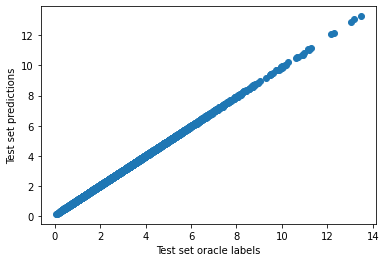

Mean squared error:  0.0014368372309396733
unpaired p value 0.2728768431626786
paired p value 0.4823647966683494
model: 100 0.01


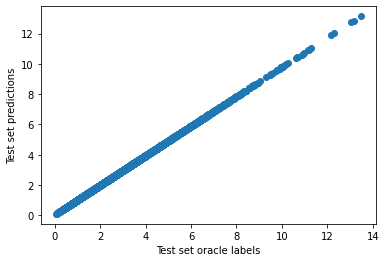

Mean squared error:  0.00357567264053107
unpaired p value 0.5600119370739436
paired p value 0.42018352933026115
model: 100 0.001


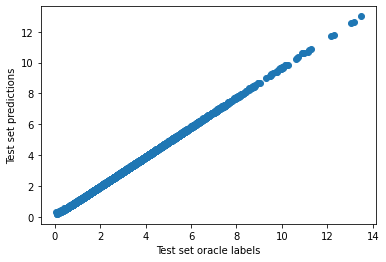

Mean squared error:  0.010955201449375309
unpaired p value 1.1871042219747685e-10
paired p value 3.374393224313827e-10
model: 100 0.0001


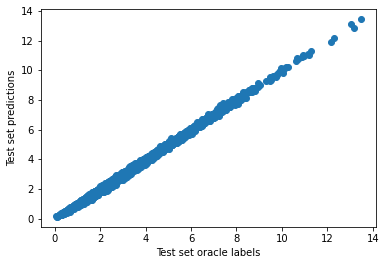

Mean squared error:  0.007144767848523083
unpaired p value 3.352800236919494e-13
paired p value 1.2727626506003538e-12
model: 100 0.0


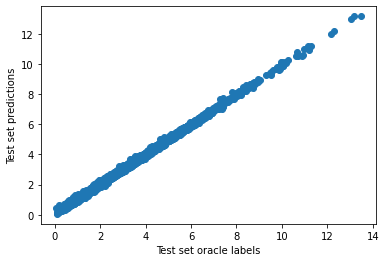

Mean squared error:  0.004840779460358156
unpaired p value 0.11180808114317448
paired p value 0.06410100211482829
model: 200 0.1


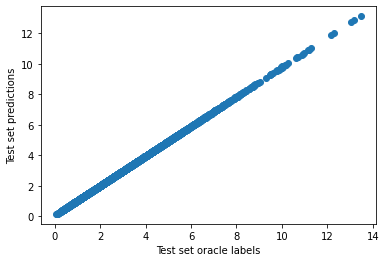

Mean squared error:  0.003716324052142305
unpaired p value 0.1284677915522961
paired p value 0.501357787569617
model: 200 0.01


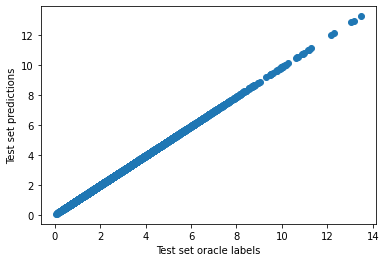

Mean squared error:  0.001965843248329326
unpaired p value 0.8383954803286813
paired p value 0.6374532003421054
model: 200 0.001


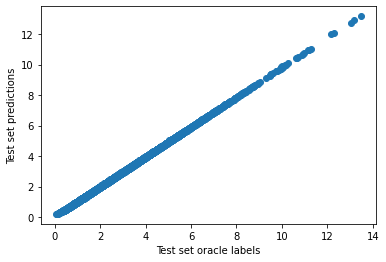

Mean squared error:  0.004375651072055984
unpaired p value 3.410203540015689e-09
paired p value 2.876478935965694e-07
model: 200 0.0001


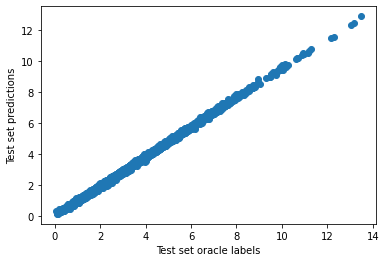

Mean squared error:  0.026553333891547036
unpaired p value 1.8736107266508897e-29
paired p value 6.543654486669071e-31
model: 200 0.0


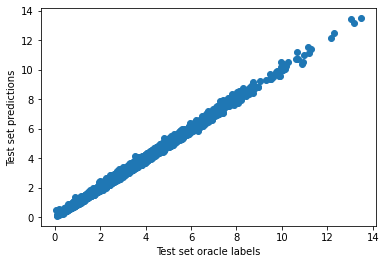

Mean squared error:  0.011545723064831759
unpaired p value 0.015903421303540367
paired p value 1.6703282230220337e-05
model: 300 0.1


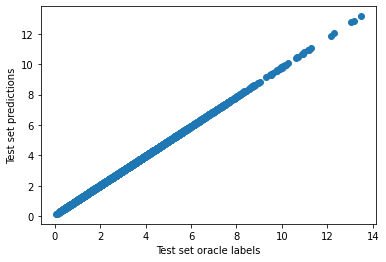

Mean squared error:  0.002579699309569026
unpaired p value 0.8878355426800001
paired p value 0.49928251672292706
model: 300 0.01


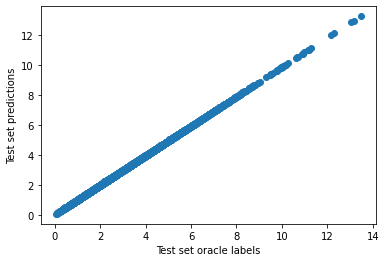

Mean squared error:  0.0012279805044989088
unpaired p value 0.19230703487528533
paired p value 0.24758651210507004
model: 300 0.001


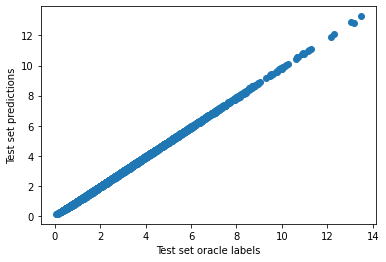

Mean squared error:  0.004176160606733335
unpaired p value 7.075156832316024e-06
paired p value 1.7796957129170294e-06
model: 300 0.0001


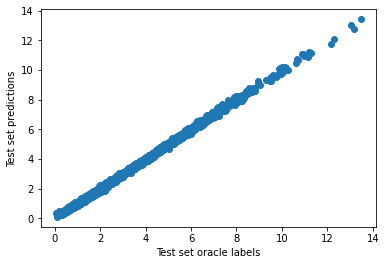

Mean squared error:  0.0043563385849969905
unpaired p value 0.007110506045244112
paired p value 3.5539537406574306e-05
model: 300 0.0


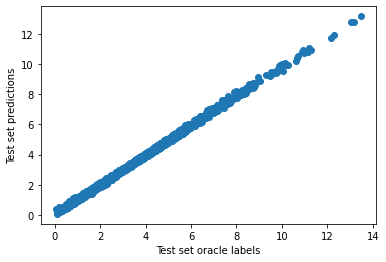

Mean squared error:  0.004654302368310354
unpaired p value 2.67472023140261e-05
paired p value 1.64472620216344e-05
model: 400 0.1


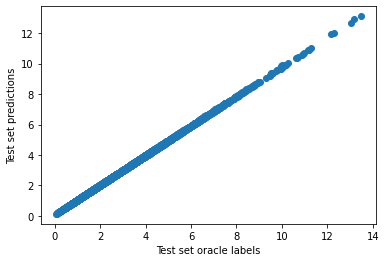

Mean squared error:  0.00291969428882423
unpaired p value 0.7136784481087479
paired p value 0.4374906340829244
model: 400 0.01


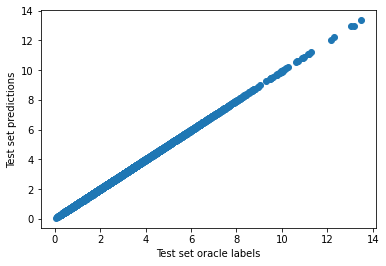

Mean squared error:  0.0006814199347114229
unpaired p value 0.8759376652536353
paired p value 0.8160768895674626
model: 400 0.001


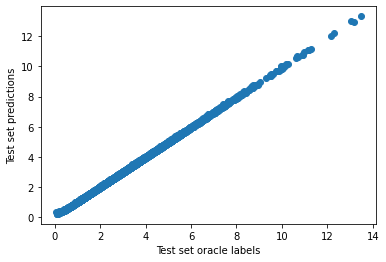

Mean squared error:  0.0012389427414148252
unpaired p value 9.33521645298016e-05
paired p value 3.0533052254071865e-05
model: 400 0.0001


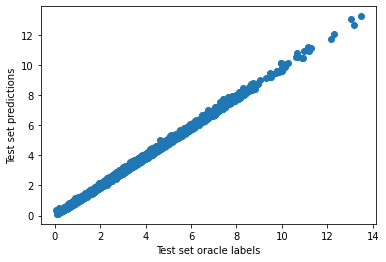

Mean squared error:  0.010089267106443804
unpaired p value 1.4839047772883553e-09
paired p value 5.362420942153101e-08
model: 400 0.0


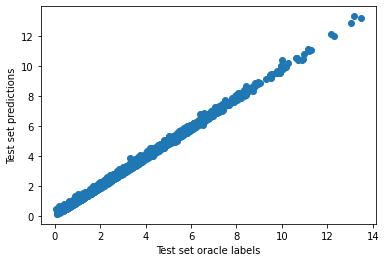

Mean squared error:  0.007690615173531144
unpaired p value 0.006482378517421526
paired p value 0.0020030576372065236
model: 500 0.1


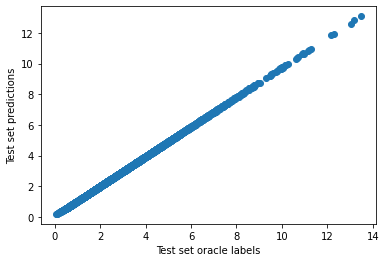

Mean squared error:  0.005004443775780937
unpaired p value 0.20648101755915266
paired p value 0.06858459732503229
model: 500 0.01


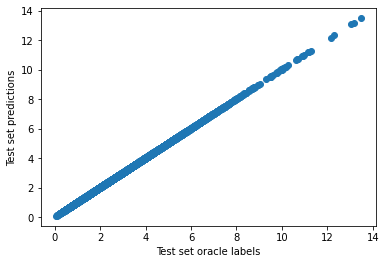

Mean squared error:  0.0015183616544817958
unpaired p value 0.9057285969093201
paired p value 0.741322989995759
model: 500 0.001


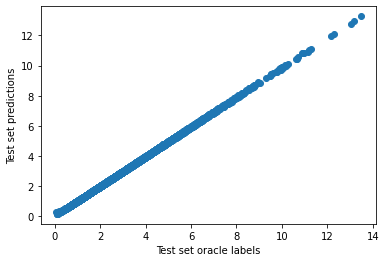

Mean squared error:  0.0018349983679246114
unpaired p value 7.056693641363246e-05
paired p value 0.00035018795071639625
model: 500 0.0001


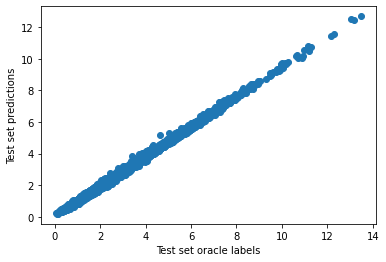

Mean squared error:  0.03343330417955834
unpaired p value 8.854741237343101e-33
paired p value 1.789776508313454e-34
model: 500 0.0


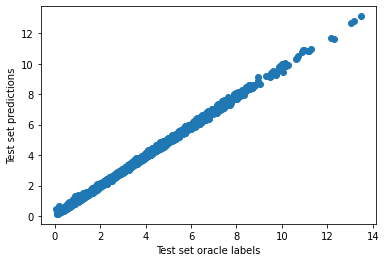

Mean squared error:  0.006551243377539159
unpaired p value 0.0008828514737342011
paired p value 1.1454093819139722e-05


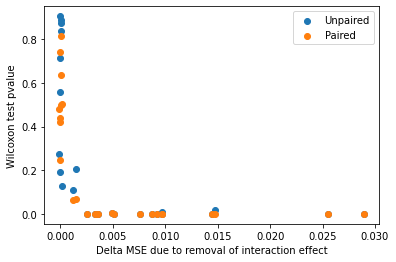

In [ ]:
#compute test set MSE
from sklearn.metrics import mean_squared_error
import scipy
import matplotlib.pyplot as plt

# num_trials = 100
# mse = []
# cond_effect_means = []
# zstats = []
# pvalues = []
# for trial in range(num_trials):

SAVEDIR = '/content/drive/My Drive/Models_tabular'
mses = []
loss_improvements = []
unpaired_pvalues = []
paired_pvalues = []
for seed in [100, 200, 300, 400, 500]:
    for l1_reg in [0.1, 0.01, 0.001, 0.0001, 0.0]:
      print("model:", seed, l1_reg)
      model = train_model(train_data, train_labels, valid_data, valid_labels, l1_reg, seed)
      #save_filename = SAVEDIR+"/poscontrol_l1reg-"+str(l1_reg)+"_seed"+str(seed)+".h5"
      # model.save(save_filename)
      test_preds = model.predict(test_data).squeeze()
      plt.scatter(test_oracle, test_preds)
      plt.xlabel("Test set oracle labels")
      plt.ylabel("Test set predictions")
      plt.show()
      mse = mean_squared_error(y_true=test_oracle, y_pred=test_preds)
      print("Mean squared error: ", mse)
      mses.append(mse)

      x_off_preds = model.predict(z_x_off).squeeze()
      y_off_preds = model.predict(z_y_off).squeeze()
      x_y_off_preds = model.predict(z_x_y_off).squeeze()

      cond_effect_test = test_preds - x_off_preds - y_off_preds + x_y_off_preds
      main_effect_test = test_preds - cond_effect_test
      decrease_in_loss = get_improvement_in_loss(test_preds, main_effect_test, test_labels)
      loss_improvements.append(np.mean(decrease_in_loss))
      zstat, pvalue = scipy.stats.mannwhitneyu(decrease_in_loss, np.zeros_like(decrease_in_loss), alternative='greater')
      unpaired_pvalues.append(pvalue)
      print("unpaired p value", pvalue)

      zstat, pvalue = scipy.stats.wilcoxon(x=decrease_in_loss, alternative='greater')
      paired_pvalues.append(pvalue)
      print("paired p value", pvalue)

plt.scatter(loss_improvements, unpaired_pvalues, label="Unpaired")
plt.scatter(loss_improvements, paired_pvalues, label="Paired")
plt.xlabel("Delta MSE due to removal of interaction effect")
plt.ylabel("Wilcoxon test pvalue")
plt.legend()
plt.show()
      # threshold = 0.5 # np.log(2) # oracle median
      # test_indices_with_motifs = [i for i in range(len(test_indices)) if 
      #                             x_test[i] > threshold and y_test[i] > threshold]
      # test_indices_background = [i for i in range(len(test_indices)) if 
      #                            x_test[i] < threshold and y_test[i] < threshold]
      # # print("fraction with high x and y values", len(test_indices_with_motifs)/len(test_indices))
      # # print("fraction with low x and y values", len(test_indices_background)/len(test_indices))
      # length = min(len(test_indices_with_motifs), len(test_indices_background))
      # print(f"Length: {length}")
      # test_indices_with_motifs = test_indices_with_motifs[:length]
      # test_indices_background = test_indices_background[:length]

      # preds_with_motifs = test_preds[test_indices_with_motifs]
      # main_effect_with_motifs = main_effect_test[test_indices_with_motifs]
      # labels_with_motifs = test_labels[test_indices_with_motifs]
      # preds_background = test_preds[test_indices_background]
      # main_effect_background = main_effect_test[test_indices_background]
      # labels_background = test_labels[test_indices_background]

      # decrease_in_loss_with_motifs = get_improvement_in_loss(preds_with_motifs, 
      #                                                        main_effect_with_motifs, 
      #                                                        labels_with_motifs)
      # decrease_in_loss_background = get_improvement_in_loss(preds_background,
      #                                                       main_effect_background,
      #                                                       labels_background)
      # zstat, pvalue = scipy.stats.mannwhitneyu(x=decrease_in_loss_with_motifs, 
      #                                          y=decrease_in_loss_background, 
      #                                          alternative='greater')
      # zstats.append(zstat)
      # pvalues.append(pvalue)


      # cond_effect = test_preds - x_off_preds - y_off_preds + x_y_off_preds
      # cond_effect_means.append(np.mean(np.abs(cond_effect)))
      # mse.append(mean_squared_error(y_true=test_oracle, y_pred=test_preds))

      # main_effect = test_preds - cond_effect

      # loss_inter = np.square(test_labels - test_preds)
      # loss_noInter = np.square(test_labels - main_effect)

      # significance, p_value = scipy.stats.mannwhitneyu(loss_noInter, loss_inter, alternative='greater')
      # unpaired.append(p_value)

      # significance, p_value = scipy.stats.wilcoxon(loss_noInter, loss_inter, alternative='greater')
      # paired.append(p_value)

      # significance, p_value = scipy.stats.wilcoxon(cond_effect, None)
      # print(p_value)

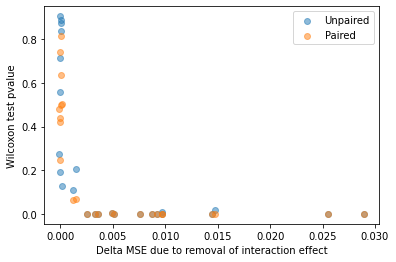

In [ ]:
plt.scatter(loss_improvements, unpaired_pvalues, label="Unpaired", alpha=0.5)
plt.scatter(loss_improvements, paired_pvalues, label="Paired", alpha=0.5)
plt.xlabel("Delta MSE due to removal of interaction effect")
plt.ylabel("Wilcoxon test pvalue")
plt.legend()
plt.show()

In [ ]:
print(np.mean(np.array(unpaired_pvalues) < 0.05))

0.56


In [ ]:
print(np.mean(np.array(paired_pvalues) < 0.05))

0.56


In [ ]:
len(unpaired_pvalues)

25

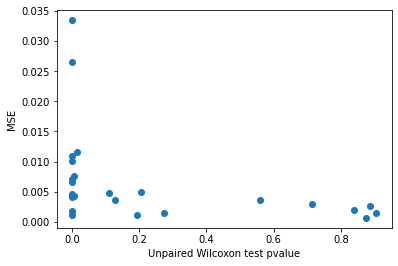

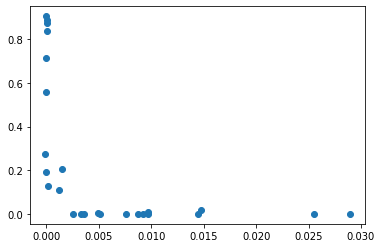

In [ ]:
plt.scatter(unpaired_pvalues, mses)
plt.xlabel("Unpaired Wilcoxon test pvalue")
plt.ylabel("MSE")
plt.show()

plt.scatter(loss_improvements, unpaired_pvalues)
plt.show()

In [ ]:
# plt.hist(pvalues, bins=50)
# plt.show()

# print(np.mean(pvalues))
# print(np.sum(np.array(pvalues) < 0.05))

In [ ]:
# from scipy.stats import pearsonr
# import matplotlib.pyplot as plt

# plt.scatter(mse, cond_effect_means)
# plt.xlabel("Oracle MSE on test set")
# plt.ylabel("Mean magnitude of interaction effect")
# plt.show()

# print(f"Pearson correlation between MSE and mean interaction effect magnitude: {pearsonr(mse, cond_effect_means)}")

In [ ]:
# import numpy as np
# from matplotlib import pyplot as plt
# u = np.random.exponential(size = (18000,))
# v = np.random.exponential(size = (18000,))
# w = np.random.exponential(size = (18000,))
# x = np.random.exponential(size = (18000,)) 
# y = np.random.exponential(size = (18000,))

# z = np.transpose(np.vstack((u, v, w, x, y)))

# z_oracle = (w + x + y)
# z_labels = np.array([np.random.normal(i, scale = 1) for i in z_oracle]) #0.5, 50

# plt.scatter(z_oracle, z_labels, alpha = 0.1)
# # plt.xlim(-10, 500)
# # plt.ylim(-10, 500)
# plt.xlabel("oracle labels")
# plt.ylabel("actual labels")
# plt.show()

# plt.hist(z_labels, bins = 100)
# plt.show()

In [ ]:
# train_data, train_labels = z[:15000], z_labels[:15000]
# valid_data, valid_labels = z[15000:16000], z_labels[15000:16000]
# test_data, test_labels = z[-2000:], z_labels[-2000:]
# test_oracle = z_oracle[-2000:]

In [ ]:
# test_preds = model.predict(test_data)
# test_oracle = z_oracle[-2000:]

# # print("MSE is", mean_squared_error(y_true=test_labels,
# #                       y_pred=test_preds))
# # print("Oracle MSE is", mean_squared_error(y_true=test_oracle,
# #                       y_pred=test_labels))

# plt.scatter(test_oracle, model.predict(test_data), alpha = 0.3)
# plt.xlabel("test oracle")
# plt.ylabel("model predictions")
# # plt.plot(range(0,150), range(0,150))
# plt.show()

# x_new = np.linspace(0, 18, 1000) #(x[:1000]+y[:1000]+w[:1000])[0]
# z_train_fit = np.polyfit(x[:15000] + y[:15000] + w[:15000], model.predict(train_data).flatten(), 1)

# f = np.poly1d(z_train_fit)
# y_new = f(x_new)
# plt.scatter((w + x + y)[:15000], model.predict(train_data), alpha = 0.3)
# plt.plot(x_new, y_new)
# plt.xlabel("w + x + y")
# plt.ylabel("net's output")
# plt.title("Model predictions: negative control")
# plt.show()

# # plt.scatter(test_oracle, test_labels, alpha = 0.3)
# # plt.xlabel("test set oracle")
# # plt.ylabel("test set labels")
# # plt.plot(range(0,10), range(0,10))
# # plt.show()

# plt.scatter(test_labels, model.predict(test_data), alpha = 0.3)
# plt.xlabel("test set labels")
# plt.ylabel("net's output")
# plt.plot(range(0,10), range(0,10))
# plt.show()

In [ ]:
# import pandas as pd
# labels = z_oracle[:15000]
# preds = model.predict(train_data)[:,0]
# diff = labels - preds
# indices = np.argsort(diff)[:10]
# labels_preds = {'oracle label': labels[indices], 'model prediction': preds[indices]}
# df = pd.DataFrame(data=labels_preds)
# pd.DataFrame(df)

In [ ]:
# x_off = np.zeros((2000,))
# y_off = np.zeros((2000,))

# u_test = u[-2000:]
# v_test = v[-2000:]
# w_test = w[-2000:]
# x_test = x[-2000:]
# y_test = y[-2000:]

# z_x_off = np.transpose(np.vstack((u_test, v_test, w_test, x_off, y_test)))
# z_y_off = np.transpose(np.vstack((u_test, v_test, w_test, x_test, y_off)))
# z_x_y_off = np.transpose(np.vstack((u_test, v_test, w_test, x_off, y_off)))

In [ ]:
# from scipy.stats import pearsonr
# print("Pearson correlation between main effect error and cond_effect: ", 
#       pearsonr(test_oracle - main_effect, cond_effect)[:2])
# plt.scatter(test_oracle - main_effect, cond_effect, alpha = 0.1)
# plt.plot(np.linspace(-0.2, 0.3, 10), np.linspace(-0.2, 0.3, 10), color='red')
# plt.xlabel("Oracle labels - predicted main effect")
# plt.ylabel("Model's interaction effect")
# plt.show()

In [ ]:
# import seaborn as sns
# sns.distplot(cond_effect)
# plt.title("FIS distribution: simple simulation negative control")
# plt.show()

In [ ]:
# pos_cond_effect = cond_effect[cond_effect > 0]
# fraction = 1.0*len(pos_cond_effect)/len(original_preds)
# print("Fraction of sequences for which inter is higher than noInter: ", fraction)
# print("Average strength of conditional effect: ", np.mean(original_preds) - np.mean(noInter_preds))

# plt.scatter(original_preds, noInter_preds, alpha = 0.3)
# plt.plot(range(0,14), range(0,14))
# plt.xlabel("original (with interactions effect)")
# plt.ylabel("without interactions effect")
# plt.show()

# plt.hist(cond_effect, bins = 1000)
# # plt.xlim((-10,10))
# plt.show()

# print(len(cond_effect[cond_effect != 0]))

In [ ]:
# cond_effect = cond_effect.flatten()
# noInter_error = np.asarray(test_labels) - noInter_preds.flatten()
# inter_error = np.asarray(test_labels) - original_preds.flatten()
# error = np.abs(inter_error) - np.abs(noInter_error)
# cond_effect_abs = np.abs(cond_effect)

# plt.xlabel("cond_effect")
# plt.ylabel("noInter error")
# plt.scatter(cond_effect, noInter_error)
# plt.xlim(0, 400)
# # plt.ylim(-400, 100)
# plt.show()

# plt.scatter(cond_effect_abs, error)
# plt.xlabel("cond_effect")
# plt.ylabel("|inter_error| - |noInter_error|")
# plt.xlim(0, 400)
# plt.ylim(-400, 100)
# plt.show()

# from scipy import stats
# from scipy.stats import spearmanr, pearsonr

# corr_error, p = spearmanr(cond_effect_abs, error) 
# print('Spearman correlation: %.3f' % corr_error)
# print(p)

In [ ]:
# plt.scatter(original_preds, noInter_preds)
# plt.xlabel("inter predictions")
# plt.ylabel("noInter predictions")
# plt.plot(np.arange(0, 19), np.arange(0, 19))
# plt.show()

In [ ]:
# threshold = 0.1
# fdr = np.sum(cond_effect < -1*threshold)/np.sum(cond_effect > threshold)
# print(fdr)

# threshold = 0
# for i in np.arange(0, 400, 0.001):
#   fdr = np.sum(cond_effect < -1*i)/np.sum(cond_effect > i)
#   if (fdr > 0.048 and fdr < 0.052):
#     threshold = i
#     break
# print(threshold, fdr)
# print(np.sum(cond_effect > threshold)/cond_effect.shape[0])


In [ ]:
#BOOTSTRAPPING: noInter_error
# from sklearn.utils import resample
# numTrials = 1000
# corrs_error = []

# indices = np.arange(0, len(cond_effect))
# for i in range(numTrials):
#   indices_samp = resample(indices, n_samples=indices.shape[0])
#   cond_effect_samp = cond_effect_abs[np.array(indices_samp)]
#   error_samp = error[np.array(indices_samp)]
#   corrs_error.append(pearsonr(cond_effect_samp, error_samp)[0])

# sorted_estimates = np.sort(np.array(corrs_error))
# conf_interval = [sorted_estimates[int(0.025 * numTrials)], sorted_estimates[int(0.975 * numTrials)]]
# print(conf_interval)

In [ ]:
#BOOTSTRAPPING: original_preds
# from sklearn.utils import resample
# numTrials = 1000
# corrs_preds = []

# indices = np.arange(0, len(cond_effect))
# for i in range(numTrials):
#   indices_samp = resample(indices, n_samples=indices.shape[0])
#   cond_effect_samp = cond_effect[np.array(indices_samp)]
#   preds_samp = original_preds[np.array(indices_samp)]
#   corrs_preds.append(spearmanr(cond_effect_samp, preds_samp)[0])

# sorted_estimates = np.sort(np.array(corrs_preds))
# conf_interval = [sorted_estimates[int(0.025 * numTrials)], sorted_estimates[int(0.975 * numTrials)]]
# print(conf_interval)

In [ ]:
# plt.hist(corrs_error, bins = 100)
# plt.show()

# plt.hist(corrs_preds, bins = 100)
# plt.show()

In [ ]:
# import scipy

# def empirical_pvalue(val, null_values):
#     pval = float(1+sum(float(val) <= np.array(null_values)))/(len(null_values)+1)
#     return pval

In [ ]:
#Labels permutation test--magnitude
# null = []
# numTrials = 1000
# for i in range(numTrials):
#   permuted_labels = np.random.permutation(test_labels)
#   lossInter = np.square(np.asarray(permuted_labels) - original_preds.flatten())
#   lossnoInter = np.square(np.asarray(permuted_labels) - noInter_preds.flatten())
#   diff = lossnoInter - lossInter
#   null.append(np.mean(diff))

# lossInter = np.square(np.asarray(test_labels) - original_preds.flatten())
# lossnoInter = np.square(np.asarray(test_labels) - noInter_preds.flatten())
# diff = lossnoInter - lossInter
# avg = np.mean(diff)

# pValueEmp = empirical_pvalue(avg, null)
# print("pValue:", pValueEmp)
# print("actual magnitude difference:", avg)

# plt.hist(null, bins = 100, alpha = 0.4)
# plt.hist(diff, bins = 1000, alpha = 0.3)
# plt.axvline(x=avg, color = "black")
# # plt.xlim(-100, 100)
# # plt.ylim(0, 150)
# plt.show()

In [ ]:
# count = 0
# p_values = np.zeros(len(diff))
# for i, example in enumerate(diff):
#   pValue = empirical_pvalue(example, null)
#   p_values[i] = pValue
#   if pValue < 0.05:
#     count +=1

# print(count)
# plt.hist(diff[p_values < 0.05], bins = 1000, label = "significant interaction effect")
# plt.hist(diff[p_values >= 0.05], bins = 1000, label = "no significant interaction")
# plt.legend(loc = 'upper left')
# plt.title("Conditional effect--positive control")
# plt.xlim(-20, 50)
# plt.ylim(0, 120)
# plt.show()

# pValue = float(np.sum([1 for i in range(len(null)) if null[i] >= avg]))/len(null)

# import seaborn as sns
# sns.distplot(null, bins=1000)
# sns.distplot(diff, bins=1000)
# plt.xlim(-20, 2000)
# plt.ylim(0, .5)
# plt.show()
# print(null)

In [ ]:
# plt.hist(model.predict(test_data), bins = 100, alpha = 0.3)
# plt.hist(test_oracle, bins = 100, alpha = 0.3)
# # plt.hist(test_data, bins = 100, alpha = 0.3)
# plt.legend(['DL model predictions', 'oracle labels']) #, 'test input'
# plt.show()

# plt.hist(test_oracle, bins = 100, alpha = 0.3)
# # plt.hist(test_data, bins = 100, alpha = 0.3)
# plt.show()

# plt.scatter(original_preds, noInter_preds)
# plt.plot(np.arange(0, 19), np.arange(0,19))
# plt.show()

# #paired wilcoxon test
# import scipy
# significance = scipy.stats.wilcoxon(original_preds.flatten(), noInter_preds.flatten())
# print(significance)


In [ ]:
# plt.scatter(main_effect, lossnoInter)
# plt.ylabel("lossnoInter")
# plt.xlabel("main effect")
# plt.plot(np.arange(0, 20), np.zeros(20))
# plt.show()
# count = (lossInter - lossnoInter) > 0
# print(np.sum(count)/lossInter.shape[0])

In [ ]:
#NEW interaction permutation test--magnitude
# null = []
# numTrials = 10000
# lossnoInter = np.square(np.asarray(test_labels) - noInter_preds.flatten())
# for i in range(numTrials):
#   permuted_inter = np.random.permutation(cond_effect)
#   inter_new = noInter_preds + permuted_inter
#   lossInter = np.square(np.asarray(test_labels) - inter_new.flatten())
#   diff = lossnoInter - lossInter
#   null.append(np.mean(diff))
# #   null.append(np.random.normal(np.mean(diff), scale = 0.1))
  
# lossInter = np.square(np.asarray(test_labels) - original_preds.flatten())
# diff = lossnoInter - lossInter
# avg = np.mean(diff)

# pValueEmp = empirical_pvalue(avg, null)
# print("pValue:", pValueEmp)
# print("actual magnitude difference:", avg)

# plt.hist(null, bins = 100)
# plt.hist(diff, bins = 1000, alpha = 0.3)
# plt.axvline(x=avg, color = "black")
# # plt.xlim(-0.5, 0.5)
# plt.ylim(0, 50)
# plt.show()

In [ ]:
#Labels permutation test--magnitude
# null = []
# numTrials = 1000
# np.random.seed(123)
# for i in range(numTrials):
#   permuted_labels = np.random.permutation(test_labels)
#   lossInter = np.square(np.asarray(permuted_labels) - original_preds.flatten())
#   lossnoInter = np.square(np.asarray(permuted_labels) - noInter_preds.flatten())
#   diff = lossnoInter - lossInter
#   null.append(np.mean(diff))

# lossInter = np.square(np.asarray(test_labels) - original_preds.flatten())
# lossnoInter = np.square(np.asarray(test_labels) - noInter_preds.flatten())

# diff = lossnoInter - lossInter
# avg = np.mean(diff)
# pValueEmp = empirical_pvalue(avg, null)

# # count = 0
# # p_values = []
# # for example in diff:
# #   pValue = empirical_pvalue(example, null)
# #   p_values.append(pValue)
# #   if pValue < 0.05:
# #     count +=1

# # print(count)
# # plt.hist(p_values)
# # plt.show()

# print("pValue")
# print(pValueEmp)
# print("actual frac")
# print(avg)
# # print("pValue avg")
# # print(np.mean(p_values))

# plt.hist(null, bins = 100)
# plt.show()

# # plt.title("Interaction effect")
# # plt.hist(diff, bins = 1000)
# # plt.show()

In [ ]:
# count = 0
# p_values = np.zeros(len(diff))
# for i, example in enumerate(diff):
#   pValue = empirical_pvalue(example, null)
#   p_values[i] = pValue
#   if pValue < 0.05:
#     count +=1

# print(count)
# plt.hist(diff[p_values < 0.05], bins = 100, label = "significant interaction effect")
# plt.hist(diff[p_values >= 0.05], bins = 100, label = "no significant interaction")
# plt.legend(loc = 'upper left')
# plt.title("Histogram of \'no inter\'-\'inter\' squared loss differential")
# plt.xlim(-1, 1)
# plt.ylim(0, 500)
# plt.show()

In [ ]:
#Labels permutation test--binary
# null = []
# numTrials = 1000
# for i in range(numTrials):
#   permuted_labels = np.random.permutation(new_test_labels)
#   lossInter = np.square(np.asarray(permuted_labels) - original_preds.flatten())
#   lossnoInter = np.square(np.asarray(permuted_labels) - noInter_preds.flatten())
#   interBetter = [int(lossInter[i] < lossnoInter[i]) for i in range(len(lossInter))]
#   frac = float(np.sum(interBetter))/len(lossInter)
#   null.append(frac)

# lossInter = np.square(np.asarray(new_test_labels) - original_preds.flatten())
# lossnoInter = np.square(np.asarray(new_test_labels) - noInter_preds.flatten())

# interBetter = [int(lossInter[i] < lossnoInter[i]) for i in range(len(lossInter))]
# frac = float(np.sum(interBetter))/len(lossInter)
# pValueEmp = empirical_pvalue(frac, null)
# print("pValue")
# print(pValueEmp)
# print("actual frac")
# print(frac)

# plt.hist(null, bins = 100)
# plt.show()

In [ ]:
#Interaction permutation test--magnitude
# merged = np.stack((original_preds.flatten(), noInter_preds.flatten()), axis = 1)
# null = []
# numTrials = 1000
# for i in range(numTrials):
#   random_1 = np.random.choice([0, 1], len(original_preds))
#   random_2 = np.random.choice([0, 1], len(original_preds))
#   sample_1 = merged[np.arange(len(original_preds)), random_1]
#   sample_2 = merged[np.arange(len(original_preds)), random_2]
#   loss1 = np.square(np.asarray(new_test_labels) - sample_1.flatten())
#   loss2 = np.square(np.asarray(new_test_labels) - sample_2.flatten())
#   diff = loss1 - loss2
#   null.append(np.mean(diff))

# lossInter = np.square(np.asarray(new_test_labels) - original_preds.flatten())
# lossnoInter = np.square(np.asarray(new_test_labels) - noInter_preds.flatten())

# diff = lossnoInter - lossInter
# avg = np.mean(diff)
# pValueEmp = empirical_pvalue(avg, null)

# print("pValue")
# print(pValueEmp)
# print("actual frac")
# print(avg)

# plt.hist(null, bins = 100)
# plt.show()

In [ ]:
#Interaction permutation test--binary
# merged = np.stack((original_preds.flatten(), noInter_preds.flatten()), axis = 1)
# null = []
# numTrials = 1000
# for i in range(numTrials):
#   random_1 = np.random.choice([0, 1], len(original_preds))
#   random_2 = np.random.choice([0, 1], len(original_preds))
#   sample_1 = merged[np.arange(len(original_preds)), random_1]
#   sample_2 = merged[np.arange(len(original_preds)), random_2]
#   loss1 = np.square(np.asarray(new_test_labels) - sample_1.flatten())
#   loss2 = np.square(np.asarray(new_test_labels) - sample_2.flatten())
#   interBetter = np.sum(loss1 < loss2)
#   frac = float(np.sum(interBetter))/len(loss1)
#   null.append(frac)

# lossInter = np.square(np.asarray(new_test_labels) - original_preds.flatten())
# lossnoInter = np.square(np.asarray(new_test_labels) - noInter_preds.flatten())
# interBetter = np.sum(lossInter < lossnoInter)
# frac = float(np.sum(interBetter))/len(lossInter)

# pValueEmp = empirical_pvalue(frac, null)

# print("pValue")
# print(pValueEmp)
# print("actual frac")
# print(frac)

# plt.hist(null, bins = 100)
# plt.show()

In [ ]:
# x_shuff = np.random.exponential()
# y_shuff = np.random.exponential()
# z_shuff = np.asarray([(x_shuff + y_shuff)])
# null = []
# for i in range(1000):
#   x_shuff_off = np.asarray([np.random.exponential()])
#   y_shuff_off = np.asarray([np.random.exponential()])
#   z_shuff_x_off = (x_shuff_off + y_shuff)
#   z_shuff_y_off = (x_shuff + y_shuff_off)
#   z_shuff_x_y_off = (x_shuff_off + y_shuff_off)
#   original_preds = model.predict(z_shuff) 
#   x_off_preds = model.predict(z_shuff_x_off)
#   y_off_preds = model.predict(z_shuff_y_off)
#   x_y_off_preds = model.predict(z_shuff_x_y_off)
#   condEffect = original_preds - x_off_preds - y_off_preds + x_y_off_preds
#   null.append(condEffect.flatten())

# hist = []
# for el in null:
#   hist.append(el[0])
  
# actual_cond_effect = float(cond_effect[0,0])
# print("actual conditional effect")
# print(actual_cond_effect)
# pValueEmp = empirical_pvalue(actual_cond_effect, hist)
# print("pValue")
# print(pValueEmp)

# plt.hist(hist, bins = 100)
# plt.show()